# Income analysis for Denmark

In this data project we analyize the income charateristics in Denmark. We focus our analysis on income for different age groups, regions and sectors in Denmark from 2013-2022.

First we import the data using and API from Danmarks Statistik. We use two statistics, LONS50 and LONS30, clean them both and merge them. 

We then start our analysis by first examining the overall income devlopment from 2013 to 2022, looking at the hourly wage (earnings in DKK per hour worked) for all of Denmark. 

We then analyize the income devlopment and income distrubution for the different areas in Denmark using a box-plot. We then look at the income distrubution for the different age groups - also using a box-plot.

Lastly we examine the devlopment and growth rate in the income for different sector. Using an interactive graph and box we also examine the sector income development for different areas. We finish by conluding our analysis of income characteristics in Denmark.

First we install the necessary programs:

In [1]:
# The DST API wrapper
%pip install git+https://github.com/alemartinello/dstapi

# A wrapper for multiple APIs with a pandas interface
%pip install pandas-datareader

# For data visualization
%pip install seaborn

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/zt/j3vldpcn0kl54_5vmb_wxwpc0000gn/T/pip-req-build-2tq2io1k
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi /private/var/folders/zt/j3vldpcn0kl54_5vmb_wxwpc0000gn/T/pip-req-build-2tq2io1k
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


The we write necessary imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import warnings
import seaborn as sns
import plotly.express as px
from IPython.display import display

import datetime
import pandas_datareader 
from dstapi import DstApi

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Importing python file
import dataprojecteksamen

#We use this later on for our plots
warnings.filterwarnings('ignore', category=FutureWarning)


# Read and clean data

Importing the first data set about income where one of the variables is age from DST through an API (we will refer to the data set as income-age).

In [3]:
ind = DstApi('LONS50') 

Getting a quick overview over the data

In [4]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table LONS50: Earnings by age, sector, salary, salary earners, components, sex and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,ALDER1,11,TOT,"Age, total",60-,60 years and over,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,AFLOEN,3,TIFA,All forms of pay,FAST,Fixed salary-earners,False
3,LONGRP,6,LTOT,Employee group total,ELE,Trainees,False
4,LØNMÅL,25,FORINKL,EARNINGS IN DKK PER HOUR WORKED,ANTAL,Number of fulltime employees in the earnings s...,False
5,KØN,3,MOK,"Men and women, total",K,Women,False
6,Tid,10,2013,2013,2022,2022,True


Then we would like to see the available values for a each variable and their id: 

In [5]:
# The available values for a each variable and their id: 
for variable in tabsum['variable name']:
   print(variable+':')
   display(ind.variable_levels(variable, language='en'))


ALDER1:


,id,text
0,TOT,"Age, total"
1,-19,Under 20 years
2,20-24,20-24 years
3,25-29,25-29 years
4,30-34,30-34 years
5,35-39,35-39 years
6,40-44,40-44 years
7,45-49,45-49 years
8,50-54,50-54 years
9,55-59,55-59 years


SEKTOR:


,id,text
0,1000,All sectors
1,1032,General government
2,1016,Government including social security funds
3,1018,Municipal and regional government total
4,1020,Regional government
5,1025,Municipal government
6,1046,Corporations and organizations


AFLOEN:


,id,text
0,TIFA,All forms of pay
1,TIME,Workers paid by the hour
2,FAST,Fixed salary-earners


LONGRP:


,id,text
0,LTOT,Employee group total
1,LED,General managers
2,VOK,Employees (exclusiv young people and trainees)
3,MED,"Employees, non-managerial level"
4,UNG,"Young people, 13-17 years"
5,ELE,Trainees


LØNMÅL:


,id,text
0,FORINKL,EARNINGS IN DKK PER HOUR WORKED
1,OVERB,Overtime payment in DKK per hour worked
2,SYGDOM,"Sickness with pay, etc. in DKK per hour worked"
3,GENE,Nuisance bonus in DKK per hour worked
4,GODE,Fringe benefits in DKK per hour worked
5,UREGEL,Irregular payments in DKK per hour worked
6,PENS,Pension including ATP in DKK per hour worked
7,BASIS,Basic earnings in DKK per hour worked
8,SFERIE,..Special holiday allowance in DKK per hour wo...
9,FERIE,..Holiday payments in DKK per hour worked


KØN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


Tid:


,id,text
0,2013,2013
1,2014,2014
2,2015,2015
3,2016,2016
4,2017,2017
5,2018,2018
6,2019,2019
7,2020,2020
8,2021,2021
9,2022,2022


Then we use the define_base_params -method to give us a nice template (where from we can select available data).

In [6]:
params = ind._define_base_params(language='en')
params

{'table': 'lons50',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER1', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'AFLOEN', 'values': ['*']},
  {'code': 'LONGRP', 'values': ['*']},
  {'code': 'LØNMÅL', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

We then choose the data we want as our parameters. We want to examine the income for different age groups and sektors.

In [7]:
# The data we want as our parameters 
params = {'table': 'lons50',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'ALDER1', 'values': ['20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-']},
  {'code': 'SEKTOR', 'values': ['1018', '1016', '1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['FORINKL']},
  {'code': 'KØN', 'values': ['MOK']},
  {'code': 'Tid', 'values': ['*']}]}


To get an overview of the data we print some infomation and the top of the table showing the data. Remove the # to show the dataframe.

In [8]:
inc_api = ind.get_data(params=params)
#inc_api.info()
#inc_api.head()

Next, we sort the data and again print the top of the table.

In [9]:
inc_api.sort_values(by=['ALDER1', 'TID', 'SEKTOR'], inplace=True)
inc_api.head(5)

,ALDER1,SEKTOR,AFLOEN,LONGRP,LØNMÅL,KØN,TID,INDHOLD
2,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,174.43
0,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,185.38
1,20-24 years,Municipal and regional government total,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2013,160.57
29,20-24 years,Corporations and organizations,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,177.54
27,20-24 years,Government including social security funds,All forms of pay,Employee group total,EARNINGS IN DKK PER HOUR WORKED,"Men and women, total",2014,186.52


It seems that the "INDHOLD" column is currently stored as an object data type and the "TID" column is stored as an int64, so we will convert it to a float data type.

In [10]:
inc_api['INDHOLD'] = inc_api['INDHOLD'].astype(float)
#print(inc_api['INDHOLD'].dtype)

In [11]:
inc_api['TID'] = inc_api['TID'].astype(float)
#print(inc_api['TID'].dtype)

We import the second data set about income where one of the variables is area in Denmark from DST through an API (we will refer to the data set as income-area). We will for this income-area data set go through the same methoed as we did for the income-age data set. 

In [12]:
ind1 = DstApi('LONS30') 

Getting a quick overview over the data

In [13]:
tabsum1 = ind1.tablesummary(language='en')
display(tabsum1)

Table LONS30: Earnings by region, sector, salary, salary earners, components, sex and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,6,000,All Denmark,081,Region Nordjylland,False
1,SEKTOR,7,1000,All sectors,1046,Corporations and organizations,False
2,AFLOEN,3,TIFA,All forms of pay,FAST,Fixed salary-earners,False
3,LONGRP,6,LTOT,Employee group total,ELE,Trainees,False
4,LØNMÅL,25,FORINKL,EARNINGS IN DKK PER HOUR WORKED,ANTAL,Number of fulltime employees in the earnings s...,False
5,KØN,3,MOK,"Men and women, total",K,Women,False
6,Tid,10,2013,2013,2022,2022,True


Then we would like to see the available values for a each variable and their id: 

In [14]:
#for variable in tabsum1['variable name']:
  #print(variable+':')
  #display(ind.variable_levels(variable, language='en'))

Then we use the define_base_params -method to give us a nice template (where from we can select available data).

In [15]:
params1 = ind1._define_base_params(language='en')
params1

{'table': 'lons30',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['*']},
  {'code': 'AFLOEN', 'values': ['*']},
  {'code': 'LONGRP', 'values': ['*']},
  {'code': 'LØNMÅL', 'values': ['*']},
  {'code': 'KØN', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

Here we choose the data we want as our parameters:

In [16]:
params1 = {'table': 'lons30',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'SEKTOR', 'values': ['1018', '1016', '1046']},
  {'code': 'AFLOEN', 'values': ['TIFA']},
  {'code': 'LONGRP', 'values': ['LTOT']},
  {'code': 'LØNMÅL', 'values': ['FORINKL']},
  {'code': 'KØN', 'values': ['MOK']},
  {'code': 'Tid', 'values': ['*']}]}

To get an overview of the data we print some infomation and the top of the table showing the data. Remove the # to show the dataframe.

In [17]:
inc1_api = ind1.get_data(params=params1)
#inc1_api.info()
#inc1_api.head()

Next, we sort the data and again print the top of the table:

In [18]:
inc1_api.sort_values(by=['OMRÅDE', 'TID', 'SEKTOR'], inplace=True)
#inc1_api.head(5)

Importing the second data set about income where one of the variables is area in Denmark from DST through an API (we will refer to the data set as income-area). We will for this income-area data set go through the same methoed as we did for the income-age data set. 

In [19]:
inc1_api['INDHOLD'] = inc1_api['INDHOLD'].astype(float)
#print(inc1_api['INDHOLD'].dtype)

In [20]:
inc1_api['TID'] = inc1_api['TID'].astype(float)
#print(inc1_api['TID'].dtype)

# Cleaning the data sets

We now clean the data set by dropping irrelevant variables and removing duplicates.

Dropping irrelevant variables from first data set:

In [21]:
Inc_age = inc_api.drop(['LONGRP', 'LØNMÅL', 'AFLOEN','KØN'],axis=1) 
Inc_age.head(10)

,ALDER1,SEKTOR,TID,INDHOLD
2,20-24 years,Corporations and organizations,2013.0,174.43
0,20-24 years,Government including social security funds,2013.0,185.38
1,20-24 years,Municipal and regional government total,2013.0,160.57
29,20-24 years,Corporations and organizations,2014.0,177.54
27,20-24 years,Government including social security funds,2014.0,186.52
28,20-24 years,Municipal and regional government total,2014.0,165.41
56,20-24 years,Corporations and organizations,2015.0,180.73
54,20-24 years,Government including social security funds,2015.0,189.93
55,20-24 years,Municipal and regional government total,2015.0,168.73
83,20-24 years,Corporations and organizations,2016.0,182.76


Dropping irrelevant variables from second data set:

In [22]:
Inc_area = inc1_api.drop(['LONGRP', 'LØNMÅL', 'AFLOEN','KØN'],axis=1) # Drop irrelevant variables
Inc_area.head(10)

,OMRÅDE,SEKTOR,TID,INDHOLD
8,All Denmark,Corporations and organizations,2013.0,297.40
20,All Denmark,Government including social security funds,2013.0,309.14
45,All Denmark,Municipal and regional government total,2013.0,270.49
157,All Denmark,Corporations and organizations,2014.0,300.91
158,All Denmark,Government including social security funds,2014.0,313.27
148,All Denmark,Municipal and regional government total,2014.0,276.19
133,All Denmark,Corporations and organizations,2015.0,304.53
130,All Denmark,Government including social security funds,2015.0,315.47
154,All Denmark,Municipal and regional government total,2015.0,281.33
3,All Denmark,Corporations and organizations,2016.0,306.22


Cleaning the data by removing duplicates:

In [23]:
Inc_age_cleaned = Inc_age.dropna().drop_duplicates()
Inc_area_cleaned = Inc_area.dropna().drop_duplicates()

# Merge data sets

We now merge the two data set into one.

We merge datasets on common 'TID' and 'SEKTOR'. We are using an inner join here, meaning we only keep rows that match in both datasets:

In [24]:
merged_df = pd.merge(Inc_age_cleaned, Inc_area_cleaned, on=['TID', 'SEKTOR'], suffixes=('_age', '_area'))

# Check the merged data
print(merged_df.head())

        ALDER1                          SEKTOR     TID  INDHOLD_age  \
0  20-24 years  Corporations and organizations  2013.0       174.43   
1  20-24 years  Corporations and organizations  2013.0       174.43   
2  20-24 years  Corporations and organizations  2013.0       174.43   
3  20-24 years  Corporations and organizations  2013.0       174.43   
4  20-24 years  Corporations and organizations  2013.0       174.43   

               OMRÅDE  INDHOLD_area  
0         All Denmark        297.40  
1  Region Hovedstaden        333.24  
2  Region Midtjylland        279.64  
3  Region Nordjylland        263.39  
4     Region Sjælland        269.16  


# Analysis

We start our analysis with a simpel overview over the income development in the years 2013-2022. The income (measured as the hourly wage) has been increasing every year in the period.

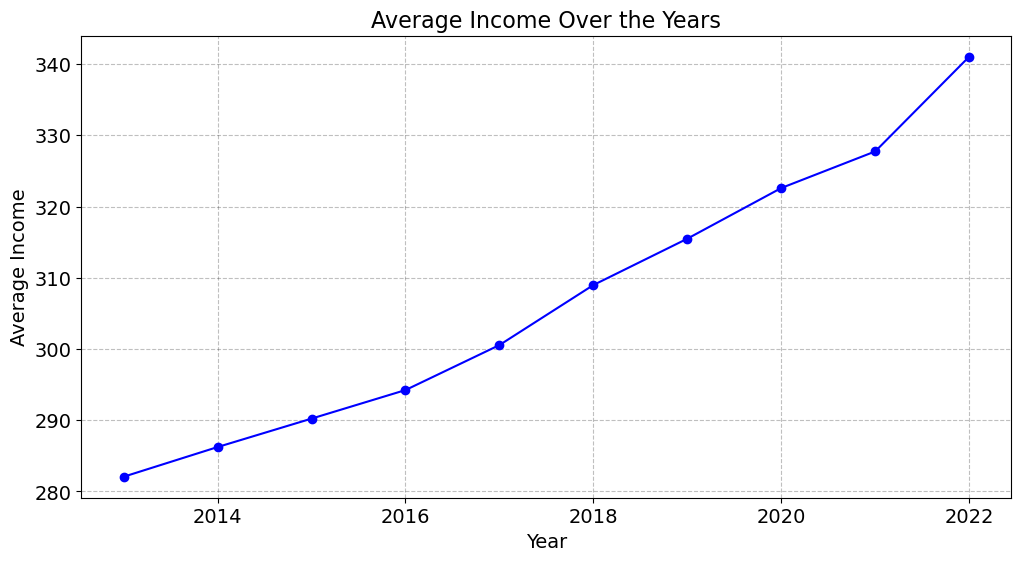

In [25]:
# We group the data by year and calculate the average income for each year
avg_income_by_year = merged_df.groupby('TID')['INDHOLD_age'].mean()

# We import the plot function from the dataproject python file
from dataproject import plot_avg_income_over_years

# Then plot the function
plot_avg_income_over_years(avg_income_by_year)

We see that the average income in Denmark has been increasing over the entire periode from 2014 to 2022.

Next, we show the development in the income for the different areas in Denmark for the same period.

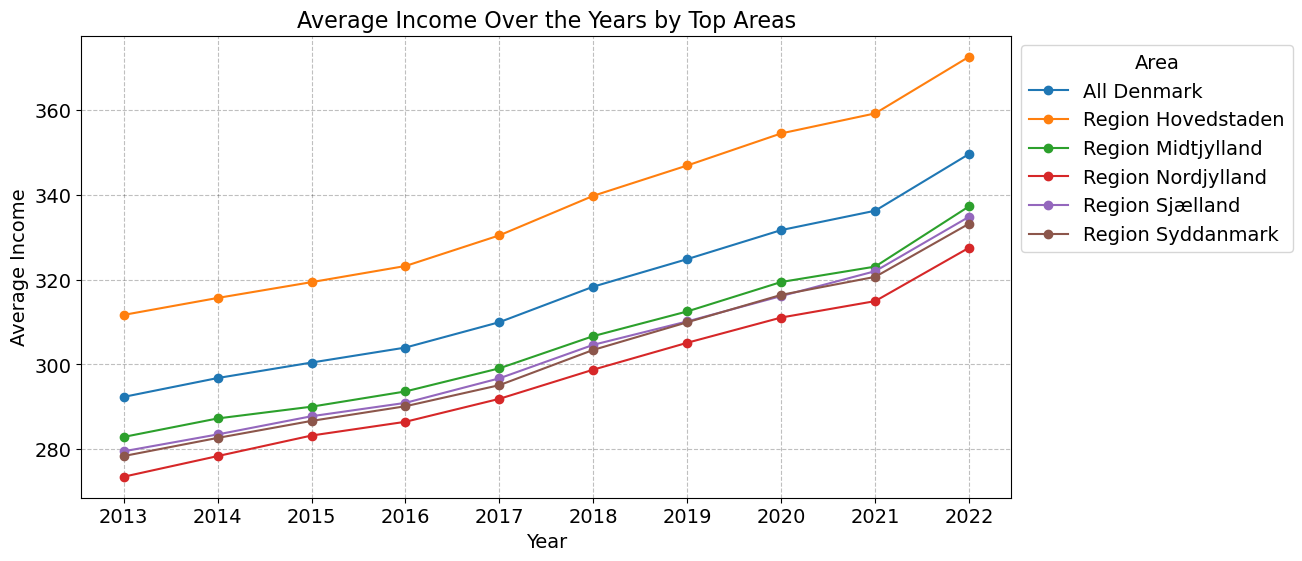

In [26]:
# We import the plot function from the python file
from dataproject import plot_avg_income_by_year_area

# Plot the function
plot_avg_income_by_year_area(merged_df)

Here we see a much higher income in Region Hovedstaden compared to the other areas, and Region Syddanmark has the lowest average income. The average income has been increasin over the entire period for all areas.

We then want to examine the income distrubution for different age groups and areas for the most recent year. In the next figure, we present two boxplots where the first one shows the income distribution by age for 2022 and the second shows the income distribution by area for 2022.

We find the most recent year in the merged dataset:

In [27]:
most_recent_year = int(merged_df['TID'].max())
print(f"Most recent year in the dataset: {most_recent_year}")

Most recent year in the dataset: 2022


We plot the income distrbution by area in the year 2022:

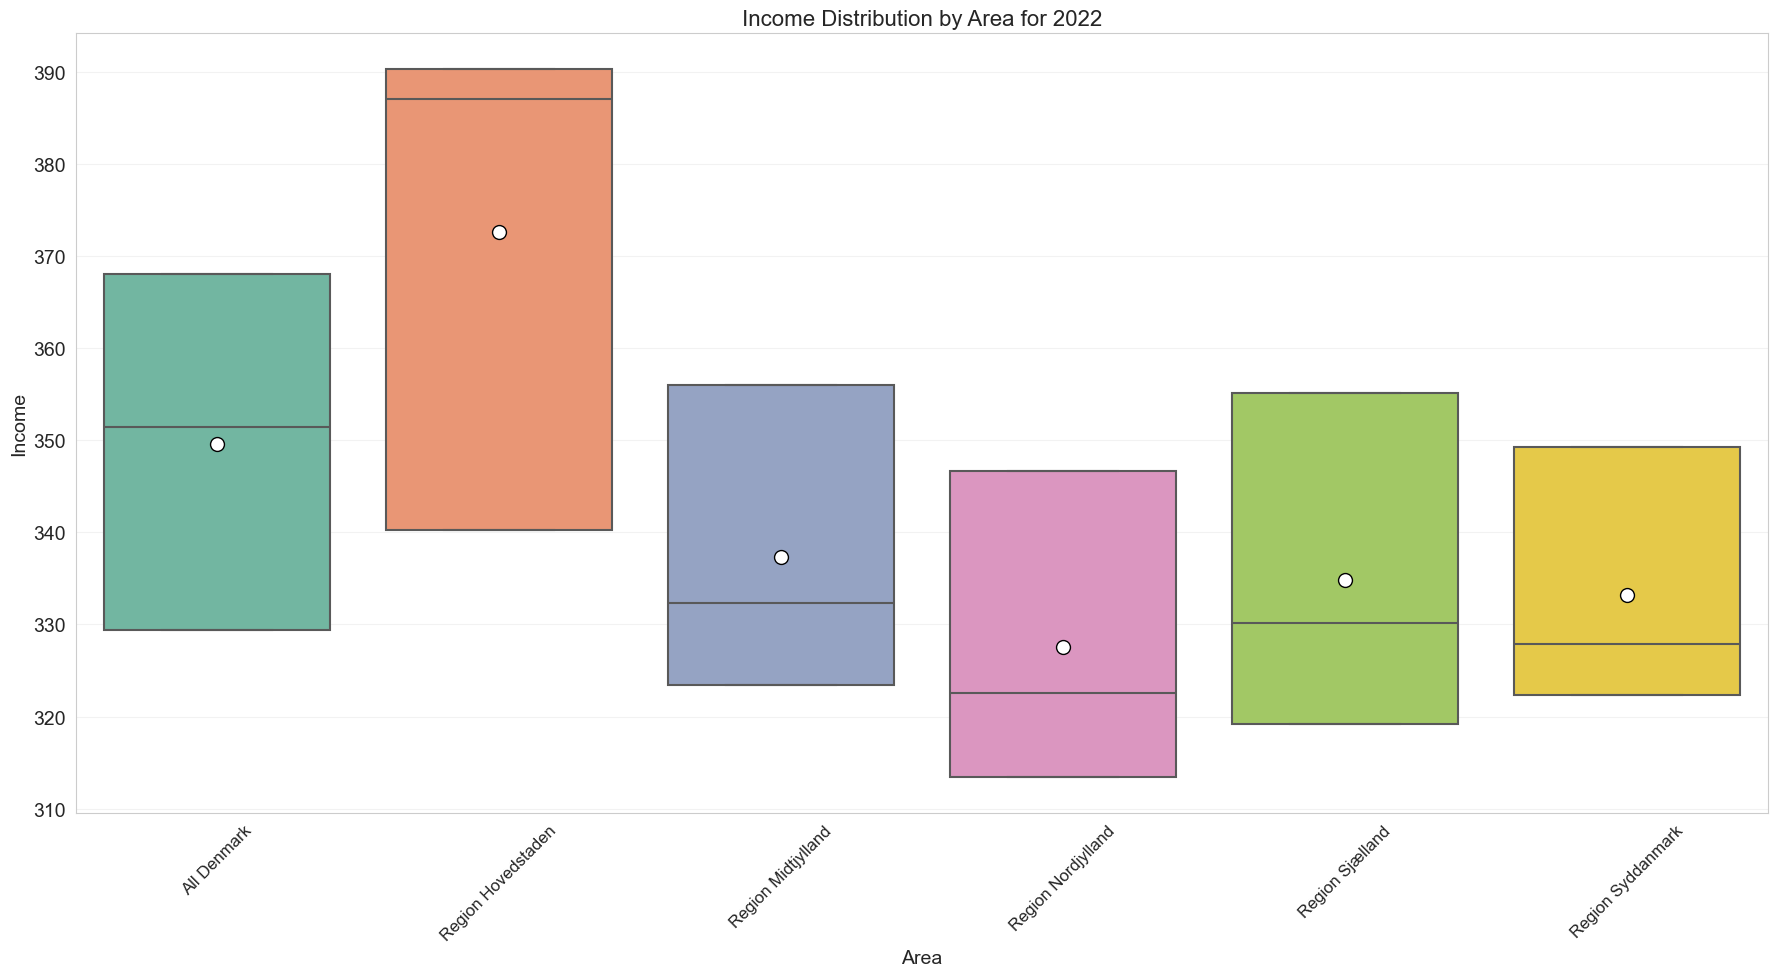

In [28]:
# We import the plot functions
from dataproject import plot_income_distribution_by_area

# We define the most recent year
most_recent_year = 2022

# We plot the functions
plot_income_distribution_by_area(merged_df, most_recent_year)

The line indicates the median income and the dot shows the mean income. 
We see that the median income is largest in Region Hovedstaden. We also see that the median is higher than the mean, which suggests that most people have higher incomes, but there are a few individuals with very low incomes that are affecting the average. For all other regions the median is lower than the mean, indicating that a smaller portion of the population in these areas contribute to raising the average income. Overall, we see that the income in Region Hovedstaden pulls up the average income for all of Denmark. The lowest average and median income is in Region Nordjylland. 

We then plot the income distrbution by age group in the year 2022:

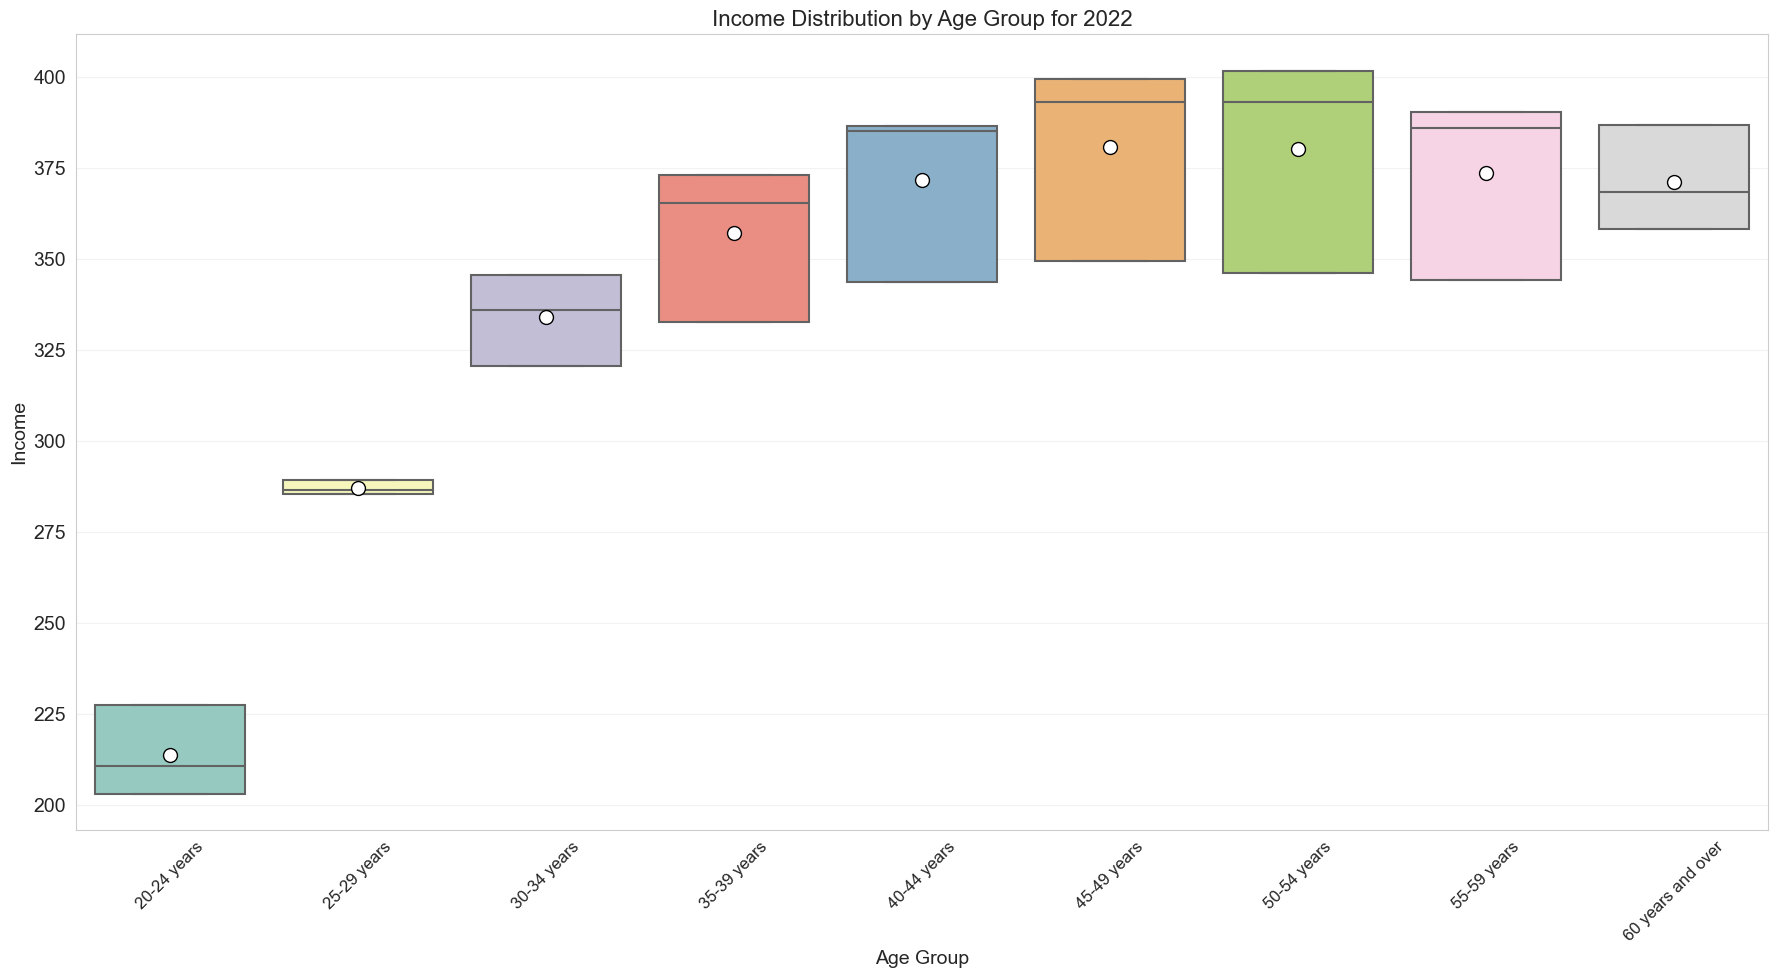

In [29]:
# We import the plot functions
from dataproject import plot_income_distribution_by_age

# We define the most recent year
most_recent_year = 2022

# We plot the functions
plot_income_distribution_by_age(merged_df, most_recent_year)

We see that the average income increases from age group 20-24 all the way to 50-54 years whereafter it falls. This is most likely because young people in the age group 20-24 are studying and therefore, and first in the age group 25-29 start to enter the workforce. As experience increase pay most likely also icnreases. In the age group 55-59 people start to enter retirement, which may contribute to the fall in average income.

We see from age group 25-29 to 55-59 the median is higher than the average income indicating that few individuals contribute to dragging down the average. Whereas for the group 20-24 and 60 years and over the median is slighty higher than the average, which indicates that the distrubtion is overall fairly equal for these groups however a few indivuals contribute a slightly higher average.

Last we want to examine the average income development for different sectors in Denmark.

We plot the average income for the different sectors for the periode 2013-2022 for different areas. The area can be choosen using the dropdown box.

In [31]:
# Import the function from the python file
from dataprojecteksamen import interactive_plot

# Plot the function
interactive_plot(Inc_age_cleaned, Inc_area_cleaned)

Dropdown(description='Select Area:', options=('All Denmark', 'Region Hovedstaden', 'Region Midtjylland', 'Regi…

Output()

When looking at all of Denmark we see that the income is greates over the entire period in the sector Corporations and organizations and lowest in Municipal and regional goverment, but has been increasing for all the three sectors over the entire period. 

In Region Hovedstaden the average income is much lower in the sector Municipal and regional goverment compared to the other two, however the average income from sector for Goverment including social security funds have increased in 2022 to be almost as high as Cooperations and organizations. 

This picture is very different when we look at the other areas in Denmark. In all other regions the income is greates in the sector for Goverment including social security funds. And in Region Nordjylland and Sjælland it is the lowest. The plots indicate that the sector Corporations and organizations provide a higher wage in the regions containing the two largest cities in Denmark, Copenhagen and Aarhus (Region Hovedstaden and Midtjylland). Wheras in the more rural areas the average income stemming from goverment and muncipial and regional goverment sectors is higher than from the private sector. 

We then examine the growth rate from 2013 to 2022 for the different sectors. The drop box can be used to select the areas.

In [32]:
# We import the growth rate funtion from the python file
from dataprojecteksamen import interactive_growth_rate

# We show the box
interactive_growth_rate(Inc_age_cleaned, Inc_area_cleaned)

Dropdown(description='Select Area:', options=('All Denmark', 'Region Hovedstaden', 'Region Midtjylland', 'Regi…

Output()

We see from the drop box that in all of Denmark the growth rate in average income has been the greatest in the sector Municipal and regional gowerment (which is also the case when looking at the regions indivdiually) and lowest in Corporations and organizations. This indicates a generall greater income growth in the public sector compared to private. 

# Conclusion

We find that income has been increasing in all regions in Denmark from 2013 to 2022. The income is greatest in the region 'Hovedstaden' and the least in 'Nordjylland' for all years, which most likely is because of 'Hovedstaden' including the capital of Denmark. Generally, we would expect to see more higher-salary jobs in capitals and larger citites. We also show two box plot with the median income for all regions and age groups in 2022. We see that although the median income for Copenhagen is very high, there is a large variability in the income distrubution for the bottom 50 pct. of income earners in 2022, with few indivduals lowering the average.

In 2022 we see that the income median is increasing in age groups but peaks at the age group 50-54 whereafter it falls. This is presumably because young people are studying and earning a lower wage for the first years of their careers whereafter salaries increase with more experience in the job market/senior positions. The fall in income in the older age groups is most likely caused by more people retiring and switching to pensions that provides a lower income than working. For almost all age groups the median is relativly high in the box-plot, which illustrates that there is greater income variability in the 50 pct. lowest earners compared to the 50 pct. highest, and that a smaller portion of the groups lowers the average.

The average income has increased for all sectors in Denmark from 2013 to 2022, however the sector Municipal and regional gowerment has had the greates growth rate, which is also the case when looking at the individual areas. In region Hovedstaden the highest income is from the sector Corporations and organizations, wheras in the other areas the sector for Goverment including social security funds has the highest average income.